In [1]:
import numpy as np
import itertools
import random

In [2]:
from functions.utils import load_graph_json
from functions.graph_functions import create_counters, add_bin, find_closest_edge, insert_bin_into_edge, generate_random_bin_coords, get_depot_info, plan_truck_routes

In [3]:
#Load map graph
nodes, edges, street_graph = load_graph_json("knowledge_base/graph_data.json")

In [4]:
comuna = 12

In [5]:
#Create bins for testing purposes
bins = generate_random_bin_coords(neighborhood = comuna, edges = edges, nodes = nodes,num_bins=30, min_id = 70000)

In [6]:
bins

[{'id': 70000,
  'coord': (-58.5031965998117, -34.572043743031884),
  'neighborhood': 12},
 {'id': 70001,
  'coord': (-58.49327519166584, -34.555696915649335),
  'neighborhood': 12},
 {'id': 70002,
  'coord': (-58.47496797098327, -34.53999990425645),
  'neighborhood': 12},
 {'id': 70003,
  'coord': (-58.48766605884335, -34.545501706644714),
  'neighborhood': 12},
 {'id': 70004,
  'coord': (-58.47690530456715, -34.55214430592301),
  'neighborhood': 12},
 {'id': 70005,
  'coord': (-58.489824855004755, -34.55338703192763),
  'neighborhood': 12},
 {'id': 70006,
  'coord': (-58.50340712199301, -34.59060731421172),
  'neighborhood': 12},
 {'id': 70007,
  'coord': (-58.503167397348754, -34.58742055855939),
  'neighborhood': 12},
 {'id': 70008,
  'coord': (-58.50926910188881, -34.5812767106046),
  'neighborhood': 12},
 {'id': 70009,
  'coord': (-58.4996340973946, -34.57543092833226),
  'neighborhood': 12},
 {'id': 70010,
  'coord': (-58.488215373250924, -34.55498970984117),
  'neighborhood': 1

In [7]:
edge_id_counter = itertools.count(max(edges.keys()) + 1 if edges else 1)
for bin_data in bins:
    bin_id = bin_data["id"]
    pos = bin_data["coord"]

    add_bin(bin_id, pos, nodes, edges, street_graph,
            edge_id_counter, max_distance=20, priority= random.randint(1, 10))
    
    print("Nuevo bin agregado con ID:", bin_id , " in pos:", pos)

Nuevo bin agregado con ID: 70000  in pos: (-58.5031965998117, -34.572043743031884)
Nuevo bin agregado con ID: 70001  in pos: (-58.49327519166584, -34.555696915649335)
Nuevo bin agregado con ID: 70002  in pos: (-58.47496797098327, -34.53999990425645)
Nuevo bin agregado con ID: 70003  in pos: (-58.48766605884335, -34.545501706644714)
Nuevo bin agregado con ID: 70004  in pos: (-58.47690530456715, -34.55214430592301)
Nuevo bin agregado con ID: 70005  in pos: (-58.489824855004755, -34.55338703192763)
Nuevo bin agregado con ID: 70006  in pos: (-58.50340712199301, -34.59060731421172)
Nuevo bin agregado con ID: 70007  in pos: (-58.503167397348754, -34.58742055855939)
Nuevo bin agregado con ID: 70008  in pos: (-58.50926910188881, -34.5812767106046)
Nuevo bin agregado con ID: 70009  in pos: (-58.4996340973946, -34.57543092833226)
Nuevo bin agregado con ID: 70010  in pos: (-58.488215373250924, -34.55498970984117)
Nuevo bin agregado con ID: 70011  in pos: (-58.50623609990388, -34.58748441059911)
N

In [8]:
intersection_ids = set()
for edge_id, data in edges.items():
    neigh = data.get('neighborhood', np.nan)
    if np.isnan(neigh):
        continue
    if int(neigh) != comuna:
        continue

    u, v = data['u'], data['v']
    if nodes[u].get('type') == 'intersection':
        intersection_ids.add(u)
    if nodes[v].get('type') == 'intersection':
        intersection_ids.add(v)

# imprimir resultados (uno por línea)
if not intersection_ids:
    print(f"No intersections found in neighborhood {comuna}")
else:
    for nid in sorted(intersection_ids):
        print(nid)


51
60
62
66
71
72
74
80
81
84
85
88
90
91
94
99
100
103
104
105
106
109
112
115
116
119
121
124
126
131
134
135
136
143
149
151
154
157
158
160
164
166
167
168
173
174
178
179
182
183
184
189
190
192
195
197
198
199
200
202
204
205
206
210
212
214
215
216
218
219
221
223
227
228
229
230
231
232
233
234
235
240
241
244
246
247
248
249
253
254
255
257
258
261
263
265
268
269
270
272
273
275
277
281
284
285
288
289
294
295
297
298
301
304
306
307
308
313
315
316
317
318
319
322
323
325
326
328
331
335
337
340
345
346
348
349
354
356
363
364
365
368
372
374
375
376
377
381
383
384
386
388
391
393
394
395
396
400
401
403
404
405
407
409
410
418
419
420
422
423
424
425
426
427
428
429
434
435
436
437
438
439
442
446
447
448
449
451
452
453
455
456
460
461
463
464
465
466
468
470
471
472
476
477
478
481
485
486
487
488
489
490
493
494
495
496
498
499
501
502
505
506
509
512
513
514
515
521
526
531
533
534
535
536
537
538
539
541
543
544
548
549
551
553
555
558
559
562
563
566
567
568
569
570


In [9]:
depot_id = 154

In [10]:
depot = get_depot_info(
    depot_id=depot_id,
    comuna=comuna,
    nodes=nodes,
    edges=edges
)

Selected depot node ID: 154, coordinates: [-58.4726923, -34.5430096]


In [11]:
routes, distance_matrix, path_matrix = plan_truck_routes(nodes = nodes, street_graph = street_graph, edges = edges, num_trucks = 3, depot_id = depot_id, balance_factor=1.0)

In [12]:
import matplotlib.pyplot as plt
import contextily as ctx
import matplotlib.colors as mcolors
import random
import heapq
import numpy as np

def get_route_path(u, v, street_graph, edges, nodes):
    """
    Returns a list of coordinates along the shortest path from u to v.
    Uses Dijkstra to get the path in node IDs.
    """
    prev = {u: None}
    dist = {u: 0}
    pq = [(0, u)]
    
    while pq:
        d_curr, node = heapq.heappop(pq)
        if node == v:
            break
        for neighbor, edge_id in street_graph.get(node, []):
            edge_distance = edges[edge_id].get("distance", 1)
            alt = d_curr + edge_distance
            if neighbor not in dist or alt < dist[neighbor]:
                dist[neighbor] = alt
                prev[neighbor] = node
                heapq.heappush(pq, (alt, neighbor))
    
    # Reconstruct path
    path = []
    current = v
    while current is not None:
        path.append(current)
        current = prev.get(current)
    path = path[::-1]
    
    coords = [nodes[n]['coord'] for n in path]
    return coords

def generate_random_colors(n):
    """
    Generate n distinct bright colors, random each run.
    """
    colors = []
    for _ in range(n):
        h = random.random()
        s = 0.8 + 0.2 * random.random()
        v = 0.8 + 0.2 * random.random()
        rgb = mcolors.hsv_to_rgb((h, s, v))
        colors.append(mcolors.to_hex(rgb))
    return colors

def plot_neighborhood_routes(nodes, edges, street_graph, routes, depot_id, target_neighborhood):
    """
    Plots streets, bins, depot, and truck routes for a specific neighborhood.
    Shows the visit order of each bin (per truck) as a number.
    """
    # Colors and sizes
    street_color = '#1f77b4'
    bin_color = '#ff7f0e'
    bin_marker_size = 200
    depot_color = '#2ca02c'
    depot_marker_size = 200
    route_linewidth = 4
    
    # Generate truck colors dynamically
    truck_colors = generate_random_colors(len(routes))
    
    edges_to_plot = set()
    for u_id, neighbors in street_graph.items():
        for v_id, edge_id in neighbors:
            neigh = edges[edge_id].get('neighborhood')
            if not np.isnan(neigh) and int(neigh) == target_neighborhood:
                edges_to_plot.add((u_id, v_id))
    
    # Separate street nodes and bin nodes
    street_nodes = set()
    bin_nodes = set()
    for u_id, v_id in edges_to_plot:
        for node_id in (u_id, v_id):
            if nodes[node_id]['type'] == 'bin':
                bin_nodes.add(node_id)
            else:
                street_nodes.add(node_id)
    
    fig, ax = plt.subplots(figsize=(12,12))
    
    # Plot streets
    for u_id, v_id in edges_to_plot:
        u_coord = nodes[u_id]['coord']
        v_coord = nodes[v_id]['coord']
        ax.plot([u_coord[0], v_coord[0]], [u_coord[1], v_coord[1]],
                color=street_color, alpha=0.7, linewidth=1)
    
    # Plot street nodes
    if street_nodes:
        x_street, y_street = zip(*[nodes[n]['coord'] for n in street_nodes])
        ax.scatter(x_street, y_street, s=20, color=street_color)
    
    # Plot bins
    if bin_nodes:
        x_bins, y_bins = zip(*[nodes[n]['coord'] for n in bin_nodes])
        ax.scatter(x_bins, y_bins, s=bin_marker_size, color=bin_color,
                   marker='o', edgecolors='black', zorder=5)
    
    # Annotate bins with visit order per truck
    for t_idx, route in enumerate(routes):
        visit_num = 1
        for node_id in route:
            if node_id == depot_id:
                continue  # skip depot
            if nodes[node_id]['type'] == 'bin':
                x, y = nodes[node_id]['coord']
                ax.text(x, y, str(visit_num),
                        fontsize=12, fontweight="bold",
                        color=truck_colors[t_idx],  # match truck color
                        ha="center", va="center", zorder=7)
                visit_num += 1
    
    # Plot depot
    depot_coord = nodes[depot_id]['coord']
    ax.scatter(depot_coord[0], depot_coord[1], s=depot_marker_size,
               color=depot_color, marker='o', edgecolors='black', zorder=6)
    
    # Plot truck routes along streets
    for t_idx, route in enumerate(routes):
        color = truck_colors[t_idx % len(truck_colors)]
        for i in range(len(route)-1):
            u, v = route[i], route[i+1]
            path_coords = get_route_path(u, v, street_graph, edges, nodes)
            xs, ys = zip(*path_coords)
            ax.plot(xs, ys, color=color, linewidth=route_linewidth,
                    alpha=0.9, zorder=4)
    
    # Add basemap
    ctx.add_basemap(ax, crs="EPSG:4326")
    ax.set_axis_off()
    plt.show()


TypeError: Hasher._batch_setitems() takes 2 positional arguments but 3 were given

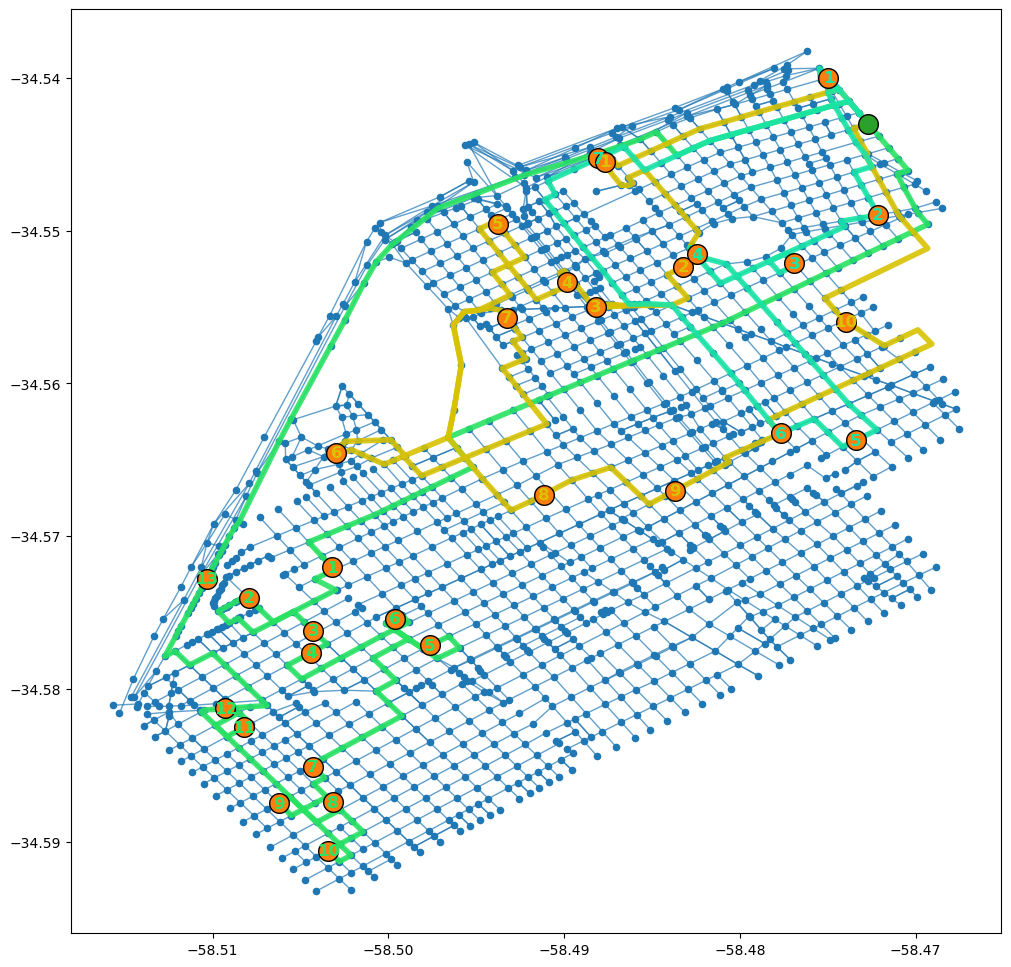

In [13]:
plot_neighborhood_routes(nodes, edges, street_graph, routes, depot_id, target_neighborhood=comuna)

In [14]:
bins

[{'id': 70000,
  'coord': (-58.5031965998117, -34.572043743031884),
  'neighborhood': 12},
 {'id': 70001,
  'coord': (-58.49327519166584, -34.555696915649335),
  'neighborhood': 12},
 {'id': 70002,
  'coord': (-58.47496797098327, -34.53999990425645),
  'neighborhood': 12},
 {'id': 70003,
  'coord': (-58.48766605884335, -34.545501706644714),
  'neighborhood': 12},
 {'id': 70004,
  'coord': (-58.47690530456715, -34.55214430592301),
  'neighborhood': 12},
 {'id': 70005,
  'coord': (-58.489824855004755, -34.55338703192763),
  'neighborhood': 12},
 {'id': 70006,
  'coord': (-58.50340712199301, -34.59060731421172),
  'neighborhood': 12},
 {'id': 70007,
  'coord': (-58.503167397348754, -34.58742055855939),
  'neighborhood': 12},
 {'id': 70008,
  'coord': (-58.50926910188881, -34.5812767106046),
  'neighborhood': 12},
 {'id': 70009,
  'coord': (-58.4996340973946, -34.57543092833226),
  'neighborhood': 12},
 {'id': 70010,
  'coord': (-58.488215373250924, -34.55498970984117),
  'neighborhood': 1

In [15]:
depot

{'id': 154, 'coord': [-58.4726923, -34.5430096], 'neighborhood': 12}

In [16]:
routes

[[154,
  70000,
  70021,
  70017,
  70019,
  70018,
  70009,
  70027,
  70007,
  70011,
  70006,
  70022,
  70008,
  70028,
  154],
 [154,
  70003,
  70026,
  70010,
  70005,
  70024,
  70015,
  70001,
  70016,
  70012,
  70023,
  154],
 [154, 70002, 70013, 70004, 70014, 70029, 70025, 70020, 154]]

import json

with open("depot_12.json", "w", encoding="utf-8") as f:
    json.dump(depot, f, indent=4, ensure_ascii=False)